In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob

path = '/content/drive/MyDrive/data/porto-seguro-safe-driver-prediction'
files = glob.glob(path + '/*.csv')
for file in files:
    if 'train' in file:
        train = pd.read_csv(file)
    elif 'test' in file:
        test = pd.read_csv(file)
    elif 'sample' in file:
        sub = pd.read_csv(file)
train.shape, test.shape, sub.shape

((595212, 59), (892816, 58), (892816, 2))

In [5]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
sub.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [25]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입']) #.sort_values()
    #summary = summary.reset_index()
    #summary = summary.rename(columns = {'index':'피처'})

    #summary['결측치 개수'] = df.isnull().sum().values #결측치가 존재하지 않더라도 -1같은 값으로 있는 경우가 있으니 확인 필요!
    
    summary['결측치 개수'] = (df == -1).sum().values # 피처별 -1 개수

    summary['고윳값 개수'] = df.nunique().values
    # summary['첫 번째 값'] = df.loc[0].values
    # summary['두 번째 값'] = df.loc[1].values
    # summary['세 번째 값'] = df.loc[2].values

    for col in df.columns: 
        
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary
summary = resumetable(train)

데이터셋 형상 : (595212, 59)


In [34]:
summary.groupby(summary['데이터 종류']).groups

{'명목형': ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'], '순서형': ['id', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], '연속형': ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'], '이진형': ['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']}

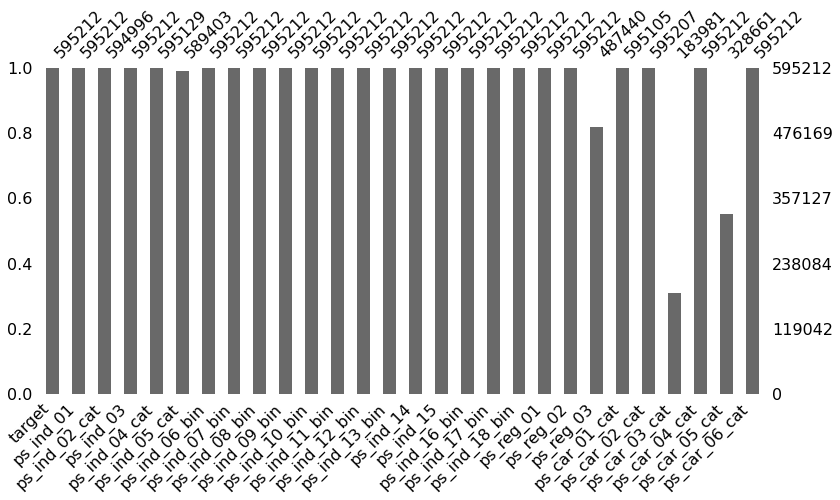

In [12]:
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN)

msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,6))

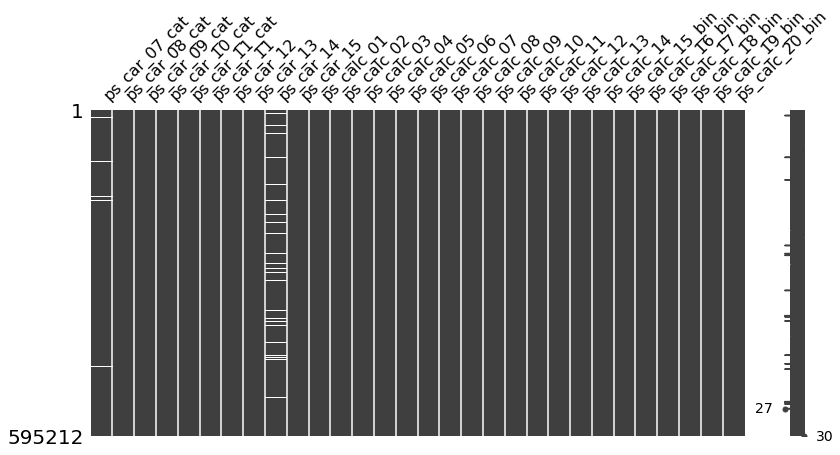

In [14]:
msno.matrix(df=train_copy.iloc[:, 29:], figsize=(13,6))

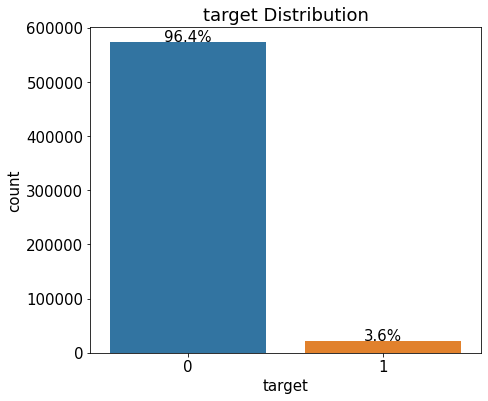

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')
mpl.rc('font', size = 15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('target Distribution')
plt.show()

In [42]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    #plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

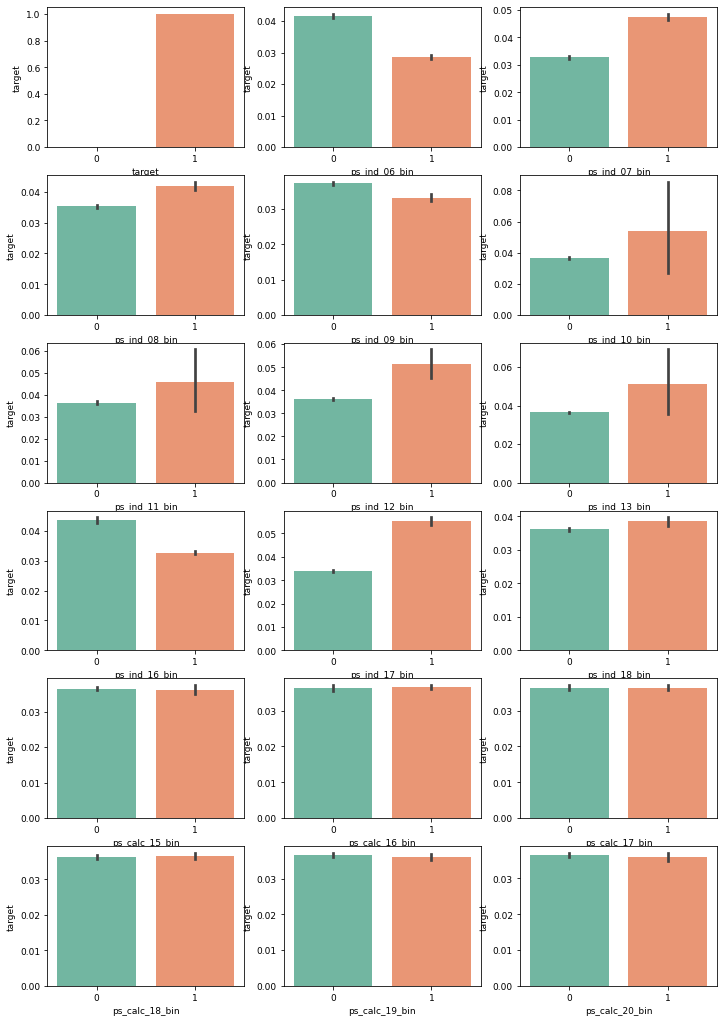

In [43]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

고윳값별로 타겟값 비율차이가 있고 신뢰구간이 좁아야 통계적으로 유효한 피처!

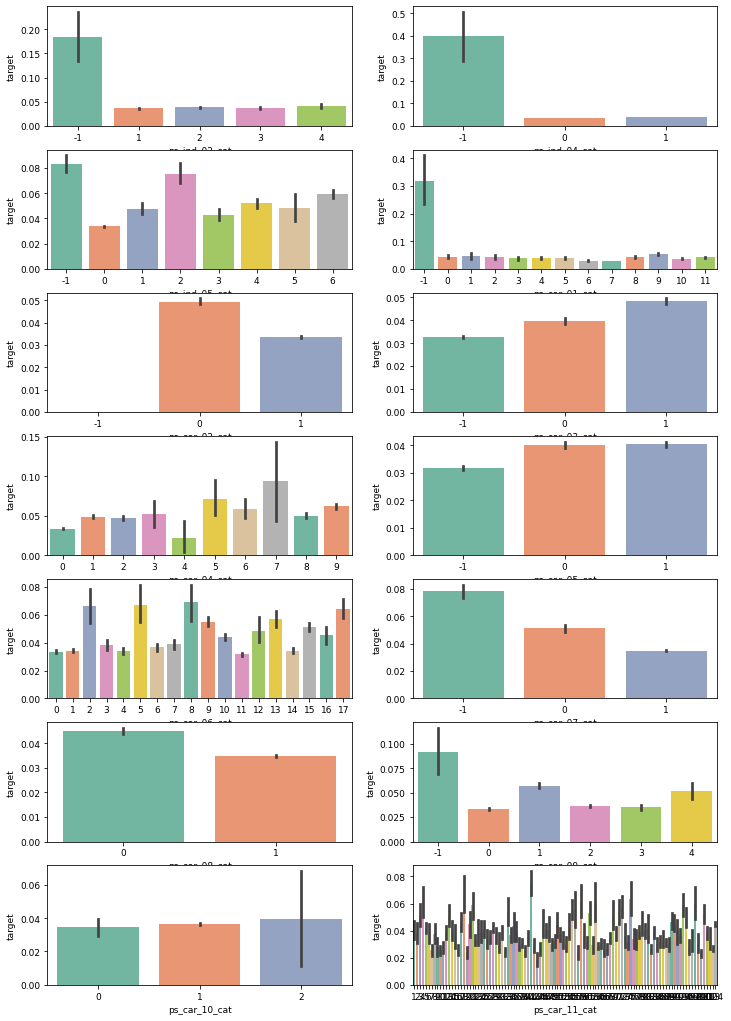

In [44]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7, 2) # 7행 2열


결측값은 -1이다. 하지만 결측값 자체가 타겟값에 예측력이 있다면 고유값으로 간주(결측값 처리 필요 없음)

ps-ind-02-cat을 보면 -1컬럼의 신뢰하한과 다른 컬럼의 신뢰상한 간 차이가 크기때문에 -1의 신뢰구간이 넓더라도 필요한 피처가 된다.

문제가 될 수 있는 피처는 ps_car_10_cat인데 애매하다. 모델링할 때 제거한 경우와 제거하지 않은 경우에 성능비교를 통해 정해보자